<a href="https://colab.research.google.com/github/shauryam-daksham/PRODIGY_PIT-MAY24-0131_Task4/blob/main/Task_4_(Bitcoin_Sentiment_Analysis_for_Twitter).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tweepy
from textblob import TextBlob
import pandas as pd
import numpy as np
import re #regular expressions
import matplotlib.pyplot as plt



In [2]:
df= pd.read_csv('Tweets.csv')
df.head()

,Unnamed: 0,date,Tweet Id,Text,Like Count,Retweet Count,Reply Count,close
0,0,2018/7/31,justinsuntron,#TRX can be traded on @Exmo_Com now. Users of ...,354,112,25,7725.43
1,1,2018/7/31,PeterLBrandt,"@KnowsJordo BTC has been, is and will be the l...",26,3,5,7725.43
2,2,2018/7/31,PeterLBrandt,@RamenofBinance @SwoleOffCrypto @MightytheJoos...,14,2,1,7725.43
3,3,2018/7/31,PeterLBrandt,Presently qualifies as a 5-pointer $BTC https:...,363,73,57,7725.43
4,4,2018/7/31,VentureCoinist,Some action in the zone I highlighted above fo...,19,1,2,7725.43


In [ ]:
df.corr()

<ipython-input-6-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Unnamed: 0,Reply Count,close
Unnamed: 0,1.000000,0.064014,0.829689
Reply Count,0.064014,1.000000,0.064607
close,0.829689,0.064607,1.000000


In [ ]:
def cleanTwt(text):
    if isinstance(text, str):
        text= re.sub('#bitcoin','bitcoin',text) #Removes the "#" from bitcoin
        text= re.sub('#Bitcoin','Bitcoin',text) #Removes the "#" from Bitcoin
        text= re.sub('#[A-Za-z0-9]+','',text) #Removes the "#" from any string
        text= re.sub('\\n','',text) #Removes the "\n" string
        text= re.sub('https?:\/\/\S+','',text) #Removes the hyperlinks

        return text.lstrip('#')
    else:
        return str(text)


In [ ]:
#Clean the tweets
df['Cleaned_Tweets'] = df['Text'].astype(str).apply(cleanTwt)
df.head()

,Unnamed: 0,date,Tweet Id,Text,Like Count,Retweet Count,Reply Count,close,Cleaned_Tweets
0,0.0,2018/7/31,justinsuntron,#TRX can be traded on @Exmo_Com now. Users of ...,354,112,25,7725.43,can be traded on @Exmo_Com now. Users of the ...
1,1.0,2018/7/31,PeterLBrandt,"@KnowsJordo BTC has been, is and will be the l...",26,3,5,7725.43,"@KnowsJordo BTC has been, is and will be the l..."
2,2.0,2018/7/31,PeterLBrandt,@RamenofBinance @SwoleOffCrypto @MightytheJoos...,14,2,1,7725.43,@RamenofBinance @SwoleOffCrypto @MightytheJoos...
3,3.0,2018/7/31,PeterLBrandt,Presently qualifies as a 5-pointer $BTC https:...,363,73,57,7725.43,Presently qualifies as a 5-pointer $BTC
4,4.0,2018/7/31,VentureCoinist,Some action in the zone I highlighted above fo...,19,1,2,7725.43,Some action in the zone I highlighted above fo...


In [ ]:
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
  return TextBlob(text).sentiment.polarity

df['Subjectivity']=df['Cleaned_Tweets'].apply(getSubjectivity)
df['Polarity']=df['Cleaned_Tweets'].apply(getPolarity)

df.head()

,Unnamed: 0,date,Tweet Id,Text,Like Count,Retweet Count,Reply Count,close,Cleaned_Tweets,Subjectivity,Polarity
0,0.0,2018/7/31,justinsuntron,#TRX can be traded on @Exmo_Com now. Users of ...,354,112,25,7725.43,can be traded on @Exmo_Com now. Users of the ...,0.700000,0.55
1,1.0,2018/7/31,PeterLBrandt,"@KnowsJordo BTC has been, is and will be the l...",26,3,5,7725.43,"@KnowsJordo BTC has been, is and will be the l...",0.000000,0.00
2,2.0,2018/7/31,PeterLBrandt,@RamenofBinance @SwoleOffCrypto @MightytheJoos...,14,2,1,7725.43,@RamenofBinance @SwoleOffCrypto @MightytheJoos...,0.288889,-0.10
3,3.0,2018/7/31,PeterLBrandt,Presently qualifies as a 5-pointer $BTC https:...,363,73,57,7725.43,Presently qualifies as a 5-pointer $BTC,0.000000,0.00
4,4.0,2018/7/31,VentureCoinist,Some action in the zone I highlighted above fo...,19,1,2,7725.43,Some action in the zone I highlighted above fo...,0.100000,0.05


In [ ]:
def getSentiment(score):
  if score <0:
    return 'Negative'
  elif score==0:
    return 'Neutral'
  else :
    return 'Positive'

In [ ]:
df['Sentiment']=df['Polarity'].apply(getSentiment)
df.head()

,Unnamed: 0,date,Tweet Id,Text,Like Count,Retweet Count,Reply Count,close,Cleaned_Tweets,Subjectivity,Polarity,Sentiment
0,0.0,2018/7/31,justinsuntron,#TRX can be traded on @Exmo_Com now. Users of ...,354,112,25,7725.43,can be traded on @Exmo_Com now. Users of the ...,0.700000,0.55,Positive
1,1.0,2018/7/31,PeterLBrandt,"@KnowsJordo BTC has been, is and will be the l...",26,3,5,7725.43,"@KnowsJordo BTC has been, is and will be the l...",0.000000,0.00,Neutral
2,2.0,2018/7/31,PeterLBrandt,@RamenofBinance @SwoleOffCrypto @MightytheJoos...,14,2,1,7725.43,@RamenofBinance @SwoleOffCrypto @MightytheJoos...,0.288889,-0.10,Negative
3,3.0,2018/7/31,PeterLBrandt,Presently qualifies as a 5-pointer $BTC https:...,363,73,57,7725.43,Presently qualifies as a 5-pointer $BTC,0.000000,0.00,Neutral
4,4.0,2018/7/31,VentureCoinist,Some action in the zone I highlighted above fo...,19,1,2,7725.43,Some action in the zone I highlighted above fo...,0.100000,0.05,Positive


In [ ]:
df.shape()

NameError: name 'df' is not defined

In [ ]:
train= df[df['Date']<'20150101']
test= df[df['Date']>'20141231']

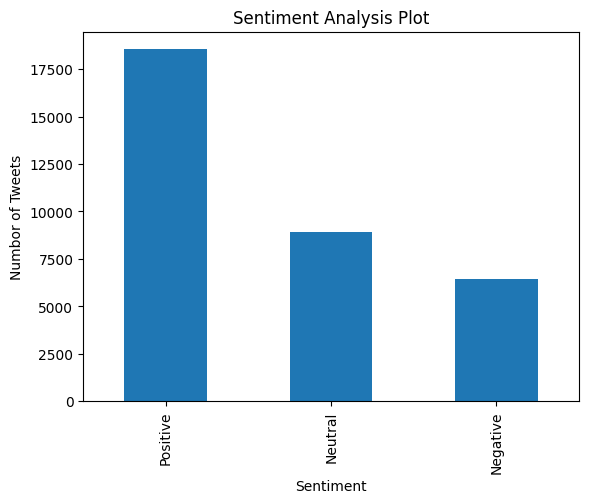

In [ ]:
df['Sentiment'].value_counts().plot(kind='bar')
plt.title('Sentiment Analysis Plot')
plt.xlabel('Sentiment')
plt.ylabel('Numbor of Tweets')
plt.show()